**JEM017 assignment 1:**
1)  
**a) Generate an AR(1) and ARMA(1,1) process. Do not use predefined functions. Estimate both the processes**


In [15]:
library(stats)
library(repr) 
library(tseries)
library(readr)
library(forecast)
library(uroot)

options(repr.plot.width = 10, repr.plot.height = 5)

ERROR: Error: package or namespace load failed for ‘readr’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called ‘hms’


In [21]:
#AR(1) process
set.seed(7257)                                                  #setting seed for replicability
l <- 500                                                        #number of observations
e <- rnorm(l)                                                   #white noise process
yt <- vector()                                                  #create blanc vector to store values of yt for t=1,...,l
phi1 <- 0.9                                                     #set value of coefficient phi 1                                                    
yt[1] <- 0                                                      #set value of yt for t=1
yt[2] <- phi1 * e[1]                                            #set value of yt for t=2
for (i in 3 : l){                                               #loop to fill in yt data for 2<t<l
    yt[i] <- phi1 * yt[i - 1] + e[i]
}
ARmodel = arima(yt, order = c(1,0,0))                           #estimate the process
ARmodel                         


Call:
arima(x = yt, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.9113     0.2095
s.e.  0.0181     0.5163

sigma^2 estimated as 1.092:  log likelihood = -732.46,  aic = 1470.93

 ARMA(1,1) process
 

In [19]:
set.seed(8087)                                                  #setting seed for replicability
l <- 500                                                        #number of observations
e <- rnorm(l)                                                   #white noise process
yt <- vector()                                                  #create blanc vector to store values of yt for t=1,...,l
phi <- 0.9                                                      #set value of coefficient phi                                                     
theta <- 0.2                                                    #set value of coefficient theta
yt[1] <- 0                                                      #set value of yt for t=1
yt[2] <- phi * e[1]                                             #set value of yt for t=2
for (i in 3 : l){                                               #loop to fill in yt data for 2<t<l
    yt[i] <- phi * yt[i - 1] + e[i] - theta * e[i-1]
}
ARMAmodel=arima(yt, order=c(1,0,1)) #estimate the process
ARMAmodel


Call:
arima(x = yt, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.8612  -0.2136    -0.0541
s.e.  0.0288   0.0566     0.2567

sigma^2 estimated as 1.05:  log likelihood = -722.2,  aic = 1452.4

We can see that both models got estimated somewhat accurately. AR(1) was set up with phi = 0.9, estimated at 0.8612. ARMA(1,1) with phi 0.9 and theta 0.2 was estimated at 0.8612 and 0.2136.

**b) Choose one real time series and estimate the best linear model (AR, MA, ARMA, ARMIA) that fits the time series.**



	Augmented Dickey-Fuller Test

data:  opening
Dickey-Fuller = -1.6281, Lag order = 6, p-value = 0.7324
alternative hypothesis: stationary


Warning message in adf.test(dopening):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  dopening
Dickey-Fuller = -5.6958, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


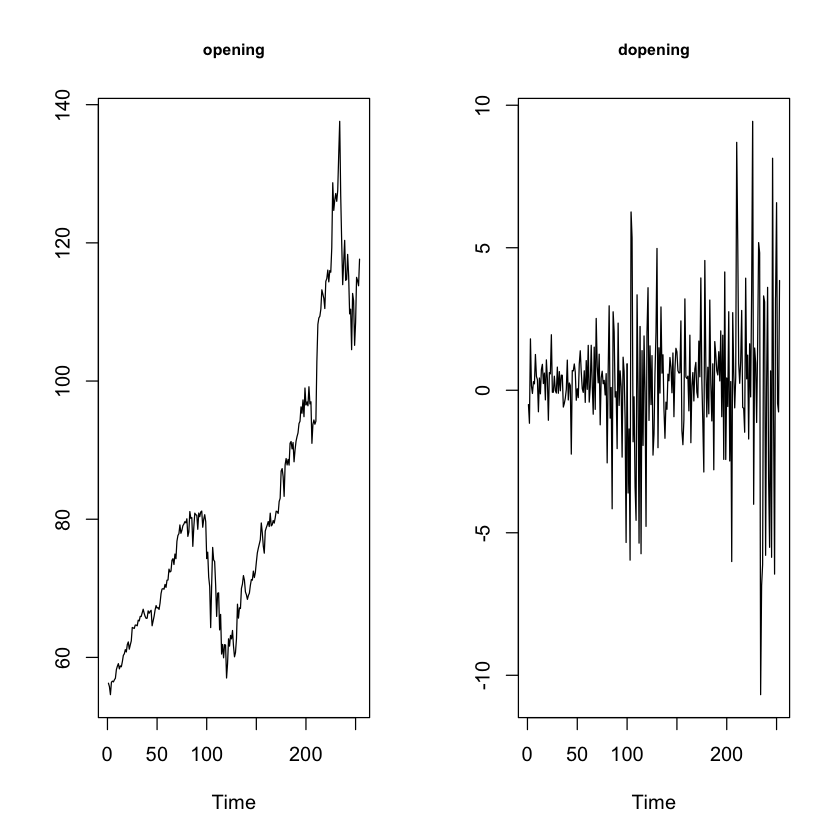

In [6]:
data <- read.csv("AAPL.csv")                                    #load Apple stock data
opening <- data[,2]                                             #assign the opening prices
dopening <- diff(opening, lag = 1)                          #take first differences
par(mfrow = c(1, 2))                                            #make graphs show in pairs

plot.ts(opening, ylab = NA, main = 'opening', cex.main = 0.8)   #plot the original opening prices as time series
plot.ts(dopening, ylab = NA, main = 'dopening', cex.main = 0.8) #plot the first differences of opening prices as time series

adf.test(opening)                                               #confirm stacionarity with a test
adf.test(dopening)                                              #confirm stacionarity with a test



In [7]:
kpss.test(opening)                                               #confirm stacionarity with a test (double-checking because of suspicious rising trend of variance)
kpss.test(dopening)                                              #confirm stacionarity with a test (double-checking because of suspicious rising trend of variance)

Warning message in kpss.test(opening):
“p-value smaller than printed p-value”


	KPSS Test for Level Stationarity

data:  opening
KPSS Level = 3.2184, Truncation lag parameter = 5, p-value = 0.01


Warning message in kpss.test(dopening):
“p-value greater than printed p-value”


	KPSS Test for Level Stationarity

data:  dopening
KPSS Level = 0.11993, Truncation lag parameter = 5, p-value = 0.1


**Plotting ACF and PACF to help with estimation of model.**

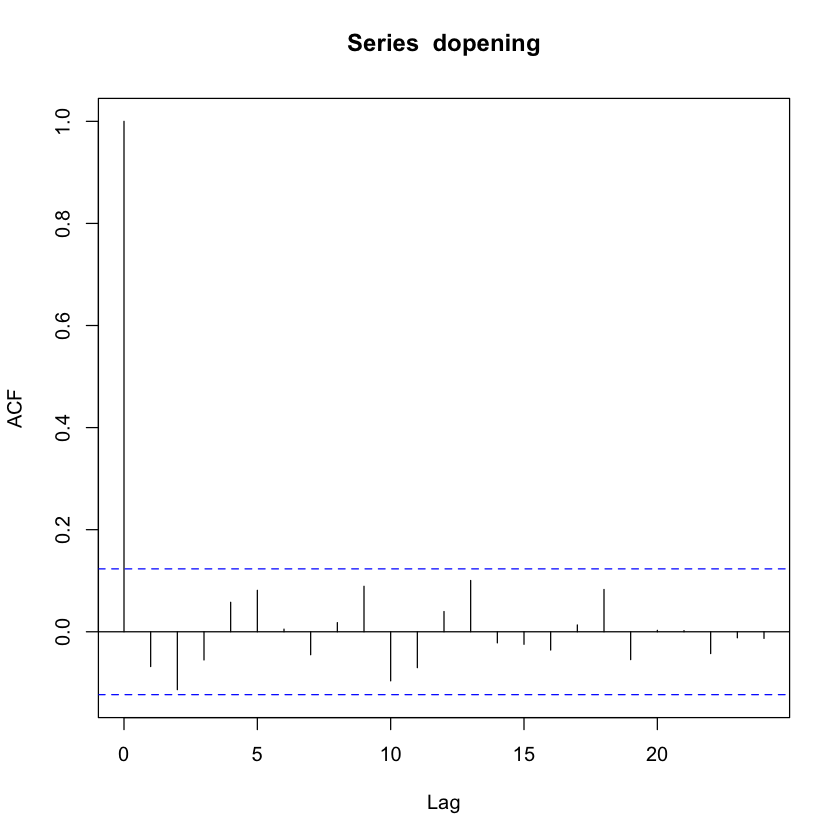

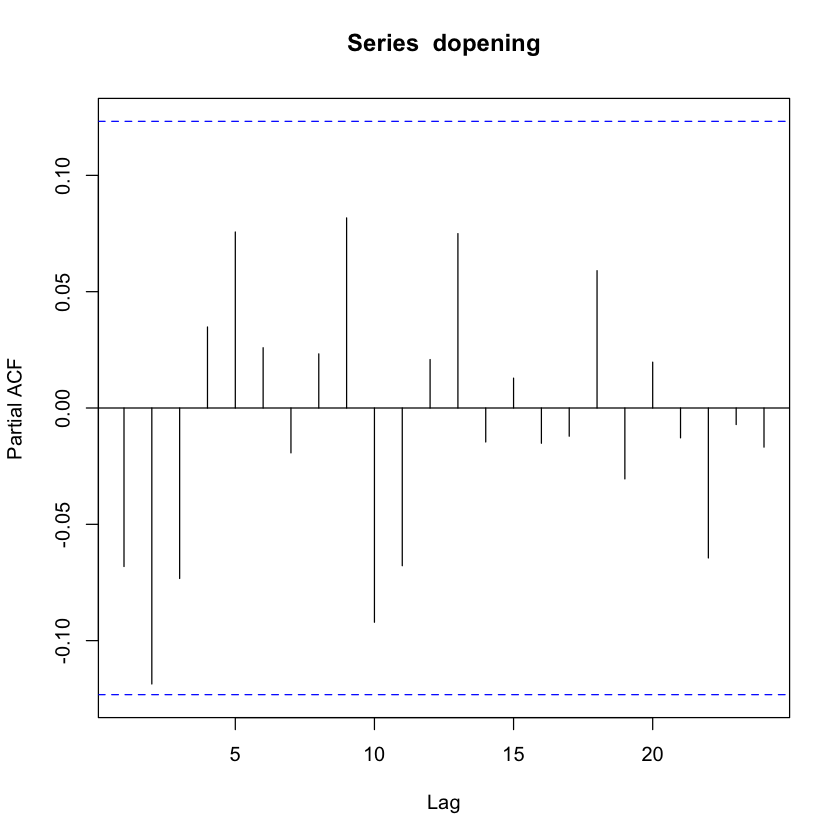

In [8]:
acf(dopening)
pacf(dopening)

In [9]:
y_model <- Arima(dopening, order = c(1, 0, 0))
summary(y_model)

ERROR: Error in Arima(dopening, order = c(1, 0, 0)): could not find function "Arima"


In [10]:
y_model1 <- Arima(dopening, order = c(0, 0, 2))
summary(y_model1)

ERROR: Error in Arima(dopening, order = c(0, 0, 2)): could not find function "Arima"


In [11]:
y_model2 <- auto.arima(dopening)
summary(y_model2)

ERROR: Error in auto.arima(dopening): could not find function "auto.arima"


In [12]:
y_model3 <- auto.arima(dopening, approximation=FALSE, stepwise =FALSE )
summary(y_model3)

ERROR: Error in auto.arima(dopening, approximation = FALSE, stepwise = FALSE): could not find function "auto.arima"


**Lowest AICc in y_model3, ARIMA(0,0,2) with non-zero mean** 


In [13]:
acf(y_model3$residuals, main = NA)                    #plotting the residuals in ACF and PACF to check whether the residuals show WN behavior
pacf(y_model3$residuals, main = NA)

ERROR: Error in as.ts(x): object 'y_model3' not found


***They do show WN behavior, using Ljung-Box test to check for lack of fit"***

In [14]:
Box.test(y_model3$residuals, type = "Ljung-Box", lag = 4)
Box.test(y_model3$residuals, type = "Ljung-Box", lag = 8)
Box.test(y_model3$residuals, type = "Ljung-Box", lag = 12)
plot.ts(dopening, ylab = NA, main = 'fitted values')
lines(y_model3$fitted, col = 'red')

ERROR: Error in NCOL(x): object 'y_model3' not found


***High p-values don't indicate lack of fit.***